# K-Means for Clustering 

In [171]:
import pandas as pd
import numpy as np
import random
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Given Dataset

In [172]:
df=pd.DataFrame()
X=[100,90,15,20,85,18]
Y=[5,7,96,105,12,110]
df['X']=X
df['Y']=Y

# Euclidean Distance

df=pd.DataFrame()
X=[100,90,15,20,85,18]
Y=[5,7,96,105,12,110]
df['X']=X
df['Y']=Y 

In [173]:
def euc(a,b):
    a=list(a)
    b=list(b)
    s=0.0
    for i in range(len(a)):
        s+=pow(a[i]-b[i],2)
    return pow(s,0.5)

In [174]:
data=[]
for i in range(len(X)):
    data.append([X[i],Y[i]])

In [191]:
def kmeans(df,k):
    if type(df)!=list:
        df=list(df.values)
    random.shuffle(df)
    kmeans=[]
    kmeans=random.sample(df,k)
    cnt=[0]*k
    cost=0
    for i in range(len(df)):
        dis=99999999999999999999999999
        group=0
        for j in range(k):
            ndis=euc(df[i],kmeans[j])
            #print ("DIS",ndis,j)
            if ndis<dis:
                dis=ndis
                group=j
        #print ("DIS--",dis,j,group)
        cost+=dis
        cnt[group]+=1
        for j in range(len(kmeans[0])):
            #break
            kmeans[group][j]=((kmeans[group][j]*(cnt[group]-1))+df[i][j])/cnt[group]
    cost=pow(cost,0.5)
    return [k,cost]
        
        

# Get Costs for various k

In [192]:
 def getcost(df,k1,k2):
    k=[]
    cost=[]
    for i in range(k1,k2):
        a,b=kmeans(df,i)
        k.append(a)
        cost.append(b)
    return k,cost


# Elbow Method for optimal k

In [193]:

def elbow(k,cost):
    plt.plot(k,cost)
    plt.xlabel('K-number of clusters')
    plt.ylabel('Cost')
    plt.show()

# Test Kmeans on Given Data

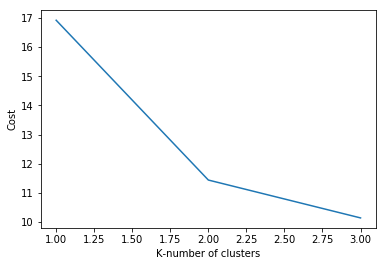

In [194]:
k,cost=getcost(df,1,4)
elbow(k,cost)

# Test Kmeans on Iris Dataset

In [195]:
df = list(datasets.load_iris().data)


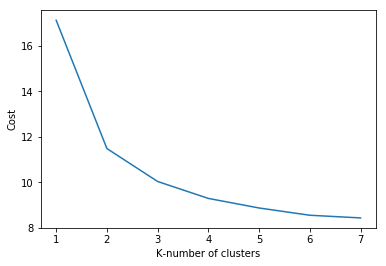

In [196]:
k,cost=getcost(df,1,8)
elbow(k,cost)

# K-Medoid for Clustering

In [197]:
df=pd.DataFrame()
X=[100,90,15,20,85,18]
Y=[5,7,96,105,12,110]
Z=[-1]*6

In [198]:
df['X']=X
df['Y']=Y
df['Z']=Z

In [183]:
data=[]
for i in range(len(X)):
    data.append([X[i],Y[i],-1])

In [184]:
def k_medoid(k,data):
    kmed=random.sample(data,k)
    #print(kmed)
    for i in range(len(data)):
        for j in range(len(kmed)):
            if data[i]==kmed[j]:
                data[i][-1]=i
                kmed[j][-1]=i
    cost=0
    for i in range(len(data)):
        dis=99999999999999999999999
        for j in range(len(kmed)):
            ndis=0
            for x in range(len(kmed[0])-1):
                ndis+=abs(data[i][x]-kmed[j][x])
            if ndis<dis:
                data[i][-1]=kmed[j][-1]
                dis=ndis
        cost+=data[i][-1]
    print ("Cost on k=",k,"is",cost)

# K-Medoid on Given Dataset

In [200]:
for i in range(1,5):
    k_medoid(i,data)

Cost on k= 1 is 6
Cost on k= 2 is 20
Cost on k= 3 is 8
Cost on k= 4 is 14


In [186]:
df = list(datasets.load_iris().data)

In [187]:
#PreProcessing
for i in range(len(df)):
    df[i]=list(df[i])
    df[i].append(-1)

# K-Medoid on Iris Dataset

In [188]:
for i in range(1,5):
    k_medoid(i,df)

Cost on k= 1 is 16800
Cost on k= 2 is 14346
Cost on k= 3 is 7548
Cost on k= 4 is 15782
